Best solution:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


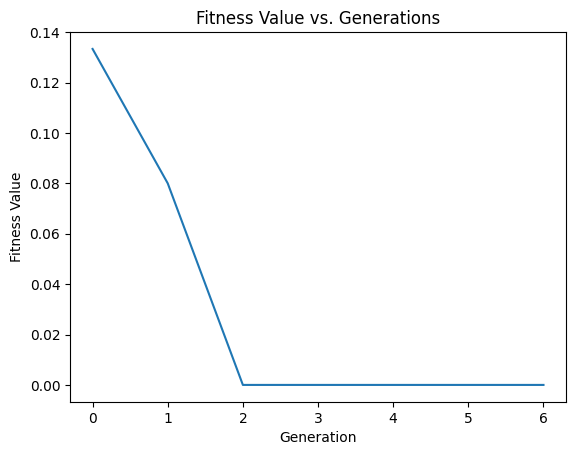

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Constants
POPULATION_SIZE = 100
MAX_GENERATIONS = 200
NUM_EMPLOYED_BEES = int(0.5 * POPULATION_SIZE)
NUM_ONLOOKER_BEES = int(0.5 * POPULATION_SIZE)
LIMIT = 100

# Resource and task scheduling problem parameters
num_resources = 5  # Number of resources
num_tasks = 10  # Number of tasks
resource_limits = np.array([10, 15, 18, 20, 12])  # Maximum availability of each resource
task_requirements = np.random.randint(1, 6, size=(num_tasks, num_resources))

class Bee:
    def __init__(self):
        self.solution = self.generate_solution()
        self.fitness = self.evaluate_fitness()

    def generate_solution(self):
        # Generate a random solution
        solution = np.zeros((num_tasks, num_resources))
        for i in range(num_tasks):
            resource_idx = random.randint(0, num_resources - 1)
            solution[i][resource_idx] = 1
        return solution

    def evaluate_fitness(self):
        resource_usage = np.sum(self.solution * task_requirements, axis=0)
        total_resource_utilization = np.sum(resource_usage) / np.sum(resource_limits)
        return total_resource_utilization

class ABC:
    def __init__(self):
        self.population = [Bee() for _ in range(POPULATION_SIZE)]
        self.global_best_solution = None
        self.global_best_fitness = float('inf')
        self.iteration = 0
        self.fitness_history = []

    def employed_bee_phase(self):
        for bee in self.population[:NUM_EMPLOYED_BEES]:
            neighbor = random.choice(self.population[:NUM_EMPLOYED_BEES])
            new_solution = self.explore_neighbor(bee.solution, neighbor.solution)
            new_fitness = self.evaluate_fitness(new_solution)
            if new_fitness < bee.fitness:
                bee.solution = new_solution
                bee.fitness = new_fitness

    def onlooker_bee_phase(self):
        fitness_values = [bee.fitness for bee in self.population[:NUM_ONLOOKER_BEES]]
        sum_fitness = sum(fitness_values)
        probabilities = [fitness / sum_fitness for fitness in fitness_values]

        for i in range(NUM_ONLOOKER_BEES):
            chosen_bee = random.choices(self.population[:NUM_ONLOOKER_BEES], probabilities)[0]
            neighbor = random.choice(self.population[:NUM_ONLOOKER_BEES])
            new_solution = self.explore_neighbor(chosen_bee.solution, neighbor.solution)
            new_fitness = self.evaluate_fitness(new_solution)
            if new_fitness < chosen_bee.fitness:
                chosen_bee.solution = new_solution
                chosen_bee.fitness = new_fitness

    def scout_bee_phase(self):
        for bee in self.population[NUM_ONLOOKER_BEES:]:
            if bee.fitness > LIMIT:
                bee.solution = bee.generate_solution()
                bee.fitness = self.evaluate_fitness(bee.solution)

    def explore_neighbor(self, solution, neighbor):
        alpha = random.uniform(0, 1)
        new_solution = solution.copy()
        for i in range(num_tasks):
            for j in range(num_resources):
                if random.uniform(0, 1) < alpha:
                    new_solution[i][j] = neighbor[i][j]
        return new_solution

    def evaluate_fitness(self, solution):
        resource_usage = np.sum(solution * task_requirements, axis=0)
        total_resource_utilization = np.sum(resource_usage) / np.sum(resource_limits)
        return total_resource_utilization

    def update_global_best(self):
        for bee in self.population:
            if bee.fitness < self.global_best_fitness:
                self.global_best_fitness = bee.fitness
                self.global_best_solution = bee.solution

    def run(self):
        while self.iteration < MAX_GENERATIONS:
            self.employed_bee_phase()
            self.onlooker_bee_phase()
            self.scout_bee_phase()
            self.update_global_best()
            self.fitness_history.append(self.global_best_fitness)
            self.iteration += 1

            # Check convergence criterion
            if len(self.fitness_history) > 5 and \
                    all(abs(self.fitness_history[-1] - fitness) < 1e-6 for fitness in self.fitness_history[-5:]):
                break

        return self.global_best_solution

abc = ABC()
best_solution = abc.run()

print("Best solution:")
print(best_solution)

# Plot the fitness value vs. generations
plt.plot(range(abc.iteration), abc.fitness_history)
plt.xlabel("Generation")
plt.ylabel("Fitness Value")
plt.title("Fitness Value vs. Generations")
plt.show()
